# Model selection and calibration datasets

To calculate realistic melt Fe3Fe2 ratios and Kd, it is important to select a model that has been calibrated with melt compositions and PT conditions similar to those of your own melts. This example shows how to plot and compare melt compositions of experiments included in datasets used to calibrate the models included in MagmaPandas.

MagmaPandas includes the calibration datasets for all Fe3/Fe2 models. Unfortunately, for many ol-melt Fe-Mg Kd models it is either not clearly explained which data were included in their calibration, or the data are not accessible. Because of this, MagmaPandas only includes calibration datasets for the {cite:t}`blundy_effect_2020` and {cite:t}`Sun2020a` Kd models.

In [1]:
from MagmaPandas.model_calibrations import plot_calibration, plot_calibration_PT, get_calibration_data
import matplotlib.pyplot as plt
import geoplot as gp
import MagmaPandas as mp

With the function `get_calibration_data` from the `model_calibration` module in Magmapandas you can retrieve model calibration datasets. Currently, this is only implemented for melt Fe3Fe2, which you need to pass to the `parameter` argument. Without supplying any other argument, the function return the calibration dataset for the model currently selected in the configuration. In this case, that is the sun2024 model.

In [2]:
print(mp.configuration)
calibration_data_Fe3Fe2 = get_calibration_data(parameter="Fe3Fe2")
calibration_data_Fe3Fe2


################## MagmaPandas ###################
##################################################
General settings__________________________________
fO2 buffer.....................................QFM
ΔfO2.............................................1
Melt Fe3+/Fe2+.............................sun2024
Kd Fe-Mg ol-melt........................toplis2005
Melt thermometer....................putirka2008_15
Volatile solubility model.......iaconomarziano2012
Volatile species.............................mixed
##################################################



,ref,run,SiO2,TiO2,Al2O3,MgO,CaO,Na2O,K2O,P2O5,MnO,CoO,NiO,Pb,FeO,T_K,fO2,_Fe3Fe2,P_bar
0,A2019,S6776,56.40,3.53,13.30,2.77,7.49,4.40,0.63,0.0,NaN,NaN,NaN,NaN,8.647177,2573.15,1.181990e+07,17.138110,230000.0
1,A2019,S6606,57.76,2.47,15.30,1.77,6.39,4.80,1.03,0.0,NaN,NaN,NaN,NaN,6.523624,2573.15,1.181990e+07,13.425202,230000.0
2,A2019,Z1850,45.06,0.75,18.33,10.20,12.87,2.23,0.00,0.0,NaN,NaN,NaN,NaN,8.098292,2473.15,1.121269e+06,1.024902,180000.0
3,A2019,Z1791,50.22,2.37,15.70,8.57,12.34,3.30,0.00,0.0,NaN,NaN,NaN,NaN,7.243473,2473.15,1.121269e+06,0.590352,180000.0
4,A2019,Z1626,52.45,2.40,14.47,2.22,6.53,5.17,0.58,0.0,NaN,NaN,NaN,NaN,13.785093,2473.15,9.320000e-04,0.052632,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,Z2016,VF59,59.66,2.76,14.43,2.05,7.18,4.16,1.10,0.0,NaN,NaN,NaN,NaN,9.349029,1623.15,6.606930e-04,0.772735,1.0
1216,Z2016,VF81,59.81,3.00,14.46,2.15,7.72,3.37,1.02,0.0,NaN,NaN,NaN,NaN,8.548197,1623.15,1.050000e-07,0.118944,1.0
1217,Z2016,VF88,60.18,2.81,14.45,2.04,7.25,3.55,0.90,0.0,NaN,NaN,NaN,NaN,9.555985,1623.15,5.500000e-07,0.191611,1.0
1218,Z2016,VF49,60.25,2.95,14.62,2.17,7.70,3.07,1.00,0.0,NaN,NaN,NaN,NaN,8.179275,1623.15,2.340000e-09,0.118318,1.0


For the default Kd model (toplis2005) the calibration dataset is not available and the `get_calibration_data` function raises an error.

In [3]:
get_calibration_data(parameter="Kd")

RuntimeError: The calibration dataset is not available for toplis2005. Please refer to the original publication.

By supplying a name to the `model` argument you can get calibration dataset for other models. The Fe3Fe2 and Kd models you can choose from are listed in the `mp.Fe3Fe2_models`  and `mp.Kd_ol_FeMg_models` variables respectively.

In [4]:
print("Fe3Fe2 models: ", mp.Fe3Fe2_models, "\nKd models: ", mp.Kd_ol_FeMg_models)

calibration_data_Kd = get_calibration_data(parameter="Kd", model="blundy2020")
calibration_data_Kd

Fe3Fe2 models:  ['armstrong2019', 'borisov2018', 'deng2020', 'fixed', 'hirschmann2022', 'jayasuriya2004', 'kress_carmichael1991', 'oneill2006', 'oneill2018', 'putirka2016_6b', 'putirka2016_6c', 'sun2024', 'zhang2017'] 
Kd models:  ['blundy2020', 'fixed', 'putirka2016_8a', 'putirka2016_8b', 'putirka2016_8c', 'putirka2016_8d', 'saper2022', 'sun2020', 'toplis2005']


,ref,run,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,...,CO2,total,_Fe3Fetotal,T_K,P_bar,_Fe3Fe2,olivine_forsterite,fO2,kd_FeTMg,kd_Fe2Mg
0,Bl2020,10,43.30,1.02,14.00,8.71,0.18,10.53,11.99,2.050,...,NaN,97.28,NaN,1523.15,13000,NaN,0.905000,NaN,0.222,NaN
1,Bl2020,12,44.01,1.15,15.19,8.85,0.20,9.60,10.53,2.710,...,NaN,97.60,NaN,1473.15,13000,NaN,0.918000,NaN,0.167,NaN
2,Bl2020,15,43.61,0.97,13.61,9.14,0.19,10.90,12.36,2.180,...,NaN,97.71,NaN,11538.15,13000,NaN,0.914000,NaN,0.195,NaN
3,Bl2020,22,44.05,1.00,13.78,9.02,0.21,10.39,12.07,2.250,...,NaN,96.69,NaN,1538.15,10000,NaN,0.949000,NaN,0.107,NaN
4,Bl2020,23,43.78,0.91,12.62,8.86,0.17,12.32,12.30,1.870,...,NaN,97.12,NaN,1548.15,7000,NaN,0.943000,NaN,0.144,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,M2006,FDA3-1.5-00,46.51,NaN,11.69,12.06,1.45,14.00,11.48,NaN,...,NaN,NaN,NaN,1573.15,1,0.800000,0.957000,2.090000e-01,NaN,0.463930
90,M2006,FDA3-10,42.52,NaN,14.05,16.98,1.03,12.25,12.17,NaN,...,NaN,NaN,NaN,1573.15,1,0.118000,0.817900,1.000000e-08,NaN,0.324638
91,M2006,FDA3-2-00,45.07,NaN,11.52,12.13,2.04,14.26,11.39,NaN,...,NaN,NaN,NaN,1573.15,1,0.800000,0.965400,2.090000e-01,NaN,0.375529
92,Ma2011,26,46.33,1.49,8.80,12.31,0.17,23.90,7.36,0.094,...,NaN,NaN,NaN,1773.15,1,0.171265,0.922940,3.090000e-06,NaN,0.338426


The function `plot_calibration_PT` plots pressures as a function of temperature for experiments from the calibration datasets. The parameter you want to show needs to be passed as an argument, so here we use `Fe3Fe2`. Without any other arguments, the plot will include all available models.

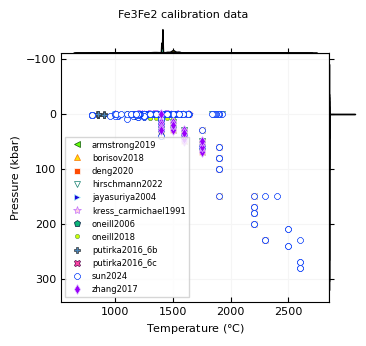

In [5]:
plot_calibration_PT(parameter="Fe3Fe2")

The plot includes kernel density estimates (kde) on the x- and y-axis. For models calibrated in a narrow pressure or temperature range, these kde's are very narrow and do not provide much information. The kde's can be removed by passing `False` to the `sidekde` argument. Note that many models use some of the same experiments in their calibrations, so many symbols overlap.

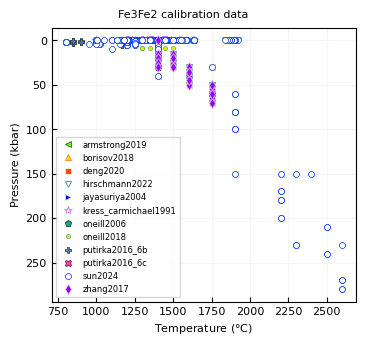

In [6]:
ax = plot_calibration_PT(parameter="Fe3Fe2", sidekde=False)


By passing a model name, or a list of model names to the `models` argument, one or more models can be plotted. Available models are listed in the `mp.Fe3Fe2_models` variable.

['armstrong2019', 'borisov2018', 'deng2020', 'fixed', 'hirschmann2022', 'jayasuriya2004', 'kress_carmichael1991', 'oneill2006', 'oneill2018', 'putirka2016_6b', 'putirka2016_6c', 'sun2024', 'zhang2017']


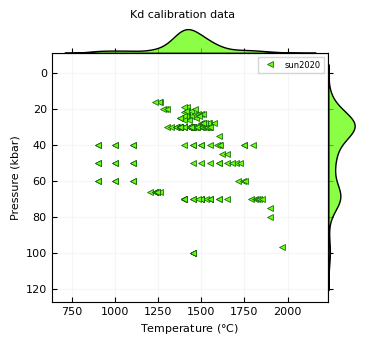

In [7]:
print(mp.Fe3Fe2_models)
plot_calibration_PT(parameter="Kd", models="sun2020")

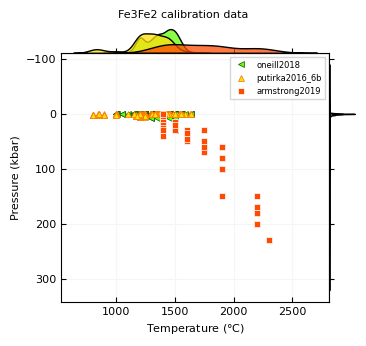

In [8]:
plot_calibration_PT(parameter="Fe3Fe2", models=["oneill2018", "putirka2016_6b", "armstrong2019"])

The function `plot_calibration` plots melt compositions of experiments included in calibration datasets. Again, the name of the parameter needs to be passed to the `parameter` argument. Without supplying any other argument, the function will show the calibration dataset for the model currently selected in the configuration. In this case, that is the sun2024 Fe3Fe2 model (see above).

x- and y-axis elements or other variables (e.g. fO2, Kd, Fe3Fe2 etc.) need to be passed as strings to the `x_elements` and `y_elements` parameters. If you provide a list of elements, they will be summed in the plot. In the example below, Na2O and K2O are plotted as a sum on the y-axis. Names have to be the same as the columns in `calibration_data` - the options for Fe3Fe2 and Kd datasets are listed below.

In [9]:
print("Fe3Fe2 options: ", list(calibration_data_Fe3Fe2.columns), "\nKd options: ", list(calibration_data_Kd.columns))

Fe3Fe2 options:  ['ref', 'run', 'SiO2', 'TiO2', 'Al2O3', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'MnO', 'CoO', 'NiO', 'Pb', 'FeO', 'T_K', 'fO2', '_Fe3Fe2', 'P_bar'] 
Kd options:  ['ref', 'run', 'SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3', 'CoO', 'NiO', 'H2O', 'CO2', 'total', '_Fe3Fetotal', 'T_K', 'P_bar', '_Fe3Fe2', 'olivine_forsterite', 'fO2', 'kd_FeTMg', 'kd_Fe2Mg']


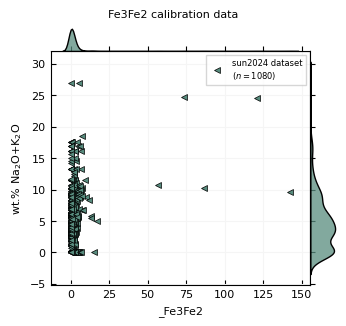

In [10]:
melt_file = "./data/melts.csv"

melt = mp.read_melt(melt_file, index_col=["name"])

x = "_Fe3Fe2"
y = ["Na2O", "K2O"]

plot_calibration(
    parameter="Fe3Fe2",
    x_elements=x,
    y_elements=y,
    sidekde=True
)

plt.show()

`plot_calibration` returns the pyplot figure and axis. If you assign them to variables, you can edit the figure or axes. Below we change the limits of the x-axis.

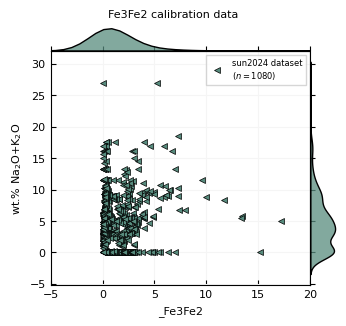

In [11]:
melt_file = "./data/melts.csv"

melt = mp.read_melt(melt_file, index_col=["name"])

x = "_Fe3Fe2"
y = ["Na2O", "K2O"]

fig, ax = plot_calibration(
    parameter="Fe3Fe2",
    x_elements=x,
    y_elements=y,
    sidekde=True
)
ax.set_xlim(-5,20)

plt.show()

To change the symbols of the plotted points, pass a dictionary to the `calibration_props` argument. This dictionary gets passed to the `plot` method of pyplot as keyword arguments. Here we plot olivine forsterite content against measured Kd Fe2-Mg values.

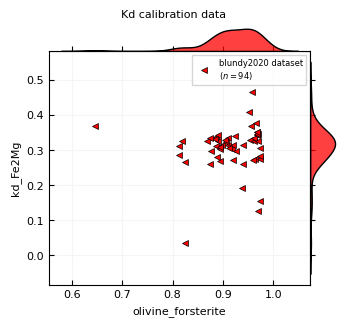

In [23]:
x = "olivine_forsterite"
y = "kd_Fe2Mg"

plot_calibration(
    parameter="Kd",
    models="blundy2020",
    x_elements=x,
    y_elements=y,
    sidekde=True,
    calibration_props={"color": "red", "markersize":5}
)

plt.show()

You can plot your own melt compositions together with the calibration data by passing them as a pandas dataframe to the `melts` argument. Column names for oxides also have to be the same as in `calibration_data`. Here the y-axis is changed to show MgO contents.

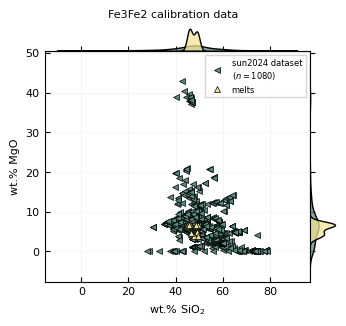

In [13]:
melt_file = "./data/melts.csv"

melt = mp.read_melt(melt_file, index_col=["name"])

x = "SiO2"
y = "MgO"

plot_calibration(
    parameter="Fe3Fe2",
    x_elements=x,
    y_elements=y,
    melts=melt,
    sidekde=True
)

plt.show()

To change the symbols of the plotted melt points, pass a dictionary to the `melt_props` argument. This dictionary gets passed to the `plot` method of pyplot as keyword arguments.

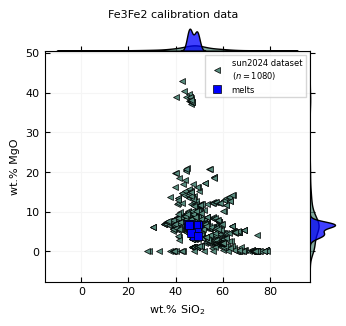

In [14]:
x = "SiO2"
y = "MgO"

plot_calibration(
    parameter="Fe3Fe2",
    x_elements=x,
    y_elements=y,
    melts=melt,
    sidekde=True,
    melt_props={"color": "blue", "markersize":6, "marker":"s"}
)

plt.show()

Here is a similar plot, with multiple models and without kde's.

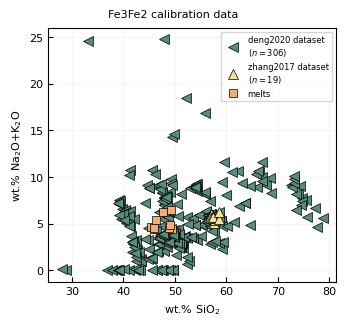

In [15]:
x = "SiO2"
y = ["Na2O", "K2O"]

plot_calibration(
    parameter="Fe3Fe2",
    models=["deng2020", "zhang2017"],
    melts=melt,
    x_elements=x,
    y_elements=y,
    sidekde=False,
    melt_props={"markersize": 6},    
    calibration_props={"markersize":7}
)

plt.show()

If you want to have more control over the plot, you can also create your own figure with matplotlib and pass the axis to the `ax` argument of `plot_calibration`.

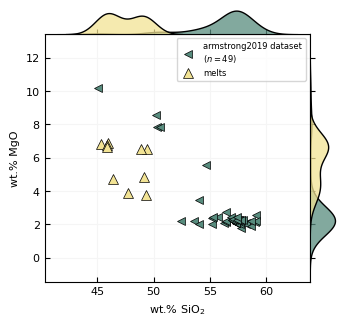

In [16]:
mm = 1 / 25.4
gp.layout(colors=gp.colors.campfire)

x = "SiO2"
y = "MgO"

fig, ax = plt.subplots(figsize=(85 * mm, 80 * mm))

calibration, *_ = plot_calibration(
    parameter="Fe3Fe2",
    models="armstrong2019",
    ax=ax,
    x_elements=x,
    y_elements=y,
    melts=melt,    
    calibration_props={"mec": "k", "ms": 6},
    melt_props={"mec": "k", "ms": 7},
)

ax.set_xlabel(f"wt.% {gp.subscript_numbers(x)}")
ax.set_ylabel(f"wt.% MgO")

ax.legend(frameon=True)

plt.show()